<a href="https://colab.research.google.com/github/ChauhanVishwa/Mini-Pinterest-Clone/blob/main/whatsapp_insights_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📁 Upload WhatsApp chat export (.txt, without media)


Saving Mike Wheeler creat.txt to Mike Wheeler creat (3).txt
✅ Loaded 74 messages

📊 STRANGER THINGS CHAT SUMMARY
🏆 Most Active Character: Mike
⏰ Peak Hour: 20:00
🙂 Dominant Mood: 😐 Neutral
💬 Total Messages: 74


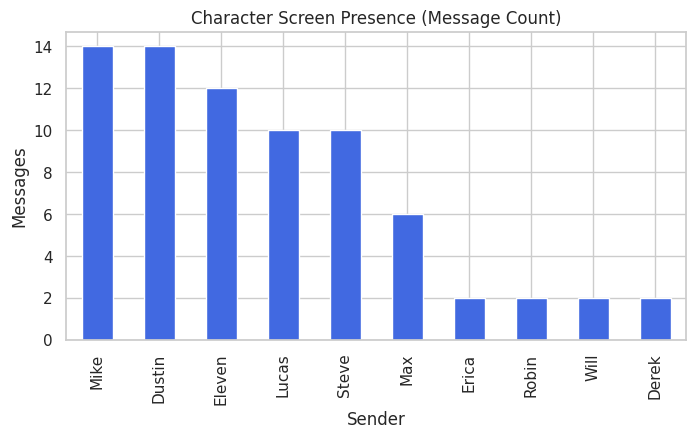


🎭 DATA-DRIVEN CHARACTER DIALOGUE INSIGHTS
  Character             Most Repeated Dialogue  Dialogue Frequency  \
0      Mike                  we stick together                   7   
1    Dustin  turn around, look at what you see                   7   
2     Lucas                      we need facts                   5   
3       Max                         seriously?                   3   
4    Eleven                  friends don’t lie                   6   
5     Steve                 i’ll take the kids                   5   
6     Erica                            hold up                   1   
7     Robin      steve hears that all the time                   1   
8      Will                  something’s wrong                   1   
9     Derek         are we actually doing this                   1   

   Total Messages  Repetition Ratio  
0              14               0.5  
1              14               0.5  
2              10               0.5  
3               6               0.

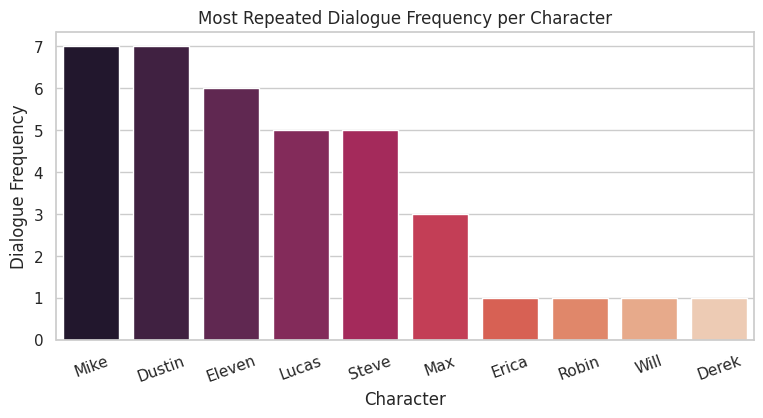

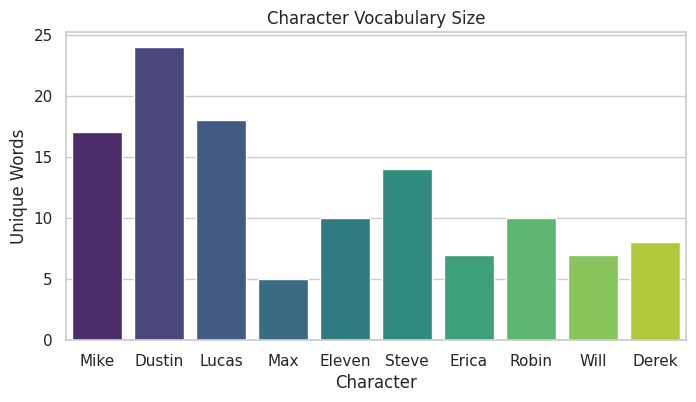

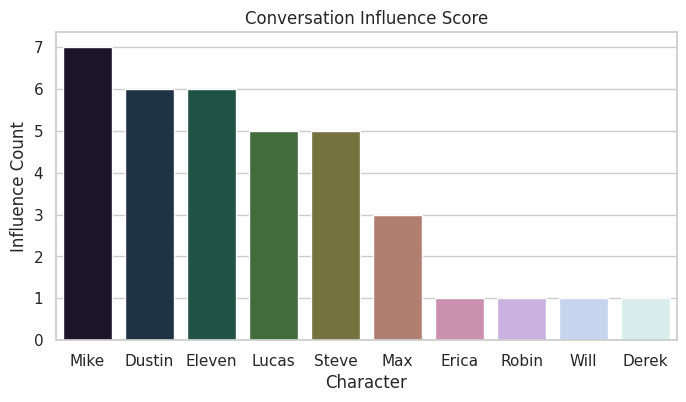


✅ Dashboard & Insights Generation Complete


In [8]:
# ==============================
# 📊 STRANGER THINGS CHAT INSIGHTS DASHBOARD
# (Data-driven, ML-style)
# ==============================

# STEP 1️⃣: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import re
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from itertools import islice
import time

# STEP 2️⃣: Upload WhatsApp Chat
from google.colab import files
print("📁 Upload WhatsApp chat export (.txt, without media)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# STEP 3️⃣: Read & Parse Chat
pattern = r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?[APMapm]{2}) - (.*?): (.*)$'
messages = []

with open(filename, 'r', encoding='utf-8') as f:
    for line in f:
        match = re.match(pattern, line)
        if match:
            date, time_, sender, message = match.groups()
            messages.append([date, time_, sender, message])

df = pd.DataFrame(messages, columns=['Date', 'Time', 'Sender', 'Message'])

if df.empty:
    print("❌ No messages found.")
else:
    print(f"✅ Loaded {len(df)} messages")

# STEP 4️⃣: Date & Time Processing
def try_parse_date(x):
    for fmt in ("%d/%m/%y", "%d/%m/%Y", "%m/%d/%y", "%m/%d/%Y"):
        try:
            return pd.to_datetime(x, format=fmt)
        except:
            continue
    return pd.NaT

df['Date'] = df['Date'].apply(try_parse_date)

def parse_hour(t):
    try:
        return pd.to_datetime(t, format='%I:%M %p').hour
    except:
        try:
            return pd.to_datetime(t, format='%H:%M').hour
        except:
            return None

df['Hour'] = df['Time'].apply(parse_hour)
df.dropna(subset=['Hour'], inplace=True)

# STEP 5️⃣: Sentiment Analysis
def get_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0

df['Sentiment'] = df['Message'].apply(get_sentiment)
df['Mood'] = df['Sentiment'].apply(
    lambda s: '🙂 Positive' if s > 0 else ('😐 Neutral' if s == 0 else '🙁 Negative')
)

# STEP 6️⃣: Summary
print("\n" + "="*70)
print("📊 STRANGER THINGS CHAT SUMMARY")
print("="*70)

top_sender = df['Sender'].value_counts().idxmax()
top_hour = int(df['Hour'].mode()[0])
top_mood = df['Mood'].value_counts().idxmax()

print(f"🏆 Most Active Character: {top_sender}")
print(f"⏰ Peak Hour: {top_hour}:00")
print(f"🙂 Dominant Mood: {top_mood}")
print(f"💬 Total Messages: {len(df)}")

# STEP 7️⃣: Visualizations
sns.set(style="whitegrid")

# 1️⃣ Character Screen Presence
plt.figure(figsize=(8,4))
df['Sender'].value_counts().head(10).plot(kind='bar', color='royalblue')
plt.title("Character Screen Presence (Message Count)")
plt.ylabel("Messages")
plt.show()

# 2️⃣ Data-driven Signature Dialogue Analysis
print("\n" + "="*70)
print("🎭 DATA-DRIVEN CHARACTER DIALOGUE INSIGHTS")
print("="*70)

dialogue_data = []

for sender in df['Sender'].unique():
    msgs = df[df['Sender'] == sender]['Message'].str.lower()
    sentence_counts = Counter(msgs)

    # pick most repeated sentence (if exists)
    if sentence_counts:
        most_common_sentence, freq = sentence_counts.most_common(1)[0]
    else:
        most_common_sentence, freq = "", 0

    dialogue_data.append([
        sender,
        most_common_sentence,
        freq,
        len(msgs)
    ])

dialogue_df = pd.DataFrame(
    dialogue_data,
    columns=[
        "Character",
        "Most Repeated Dialogue",
        "Dialogue Frequency",
        "Total Messages"
    ]
)

dialogue_df['Repetition Ratio'] = (
    dialogue_df['Dialogue Frequency'] / dialogue_df['Total Messages']
).round(2)

print(dialogue_df.sort_values("Repetition Ratio", ascending=False))

# Visualization – Dialogue Dominance
plt.figure(figsize=(9,4))
sns.barplot(
    x="Character",
    y="Dialogue Frequency",
    data=dialogue_df.sort_values("Dialogue Frequency", ascending=False),
    palette="rocket"
)
plt.title("Most Repeated Dialogue Frequency per Character")
plt.xticks(rotation=20)
plt.show()

# 3️⃣ Vocabulary / Character Uniqueness
vocab_counts = []
for character in df['Sender'].unique():
    messages_char = " ".join(df[df['Sender']==character]['Message']).lower().split()
    words = [w for w in messages_char if w.isalpha()]
    unique_words = set(words)
    vocab_counts.append([character, len(unique_words)])

vocab_df = pd.DataFrame(vocab_counts, columns=["Character", "UniqueWords"])

plt.figure(figsize=(8,4))
sns.barplot(x="Character", y="UniqueWords", data=vocab_df, palette="viridis")
plt.title("Character Vocabulary Size")
plt.ylabel("Unique Words")
plt.show()

# 4️⃣ Conversation Influence / Turn-Based Leadership
influence_counts = []
df_reset = df.reset_index()
for i in range(len(df_reset)-1):
    sender = df_reset.loc[i, 'Sender']
    next_sender = df_reset.loc[i+1, 'Sender']
    if sender != next_sender:
        influence_counts.append(sender)

influence_df = pd.DataFrame(Counter(influence_counts).items(), columns=['Character','InfluenceScore'])
influence_df = influence_df.sort_values(by='InfluenceScore', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Character', y='InfluenceScore', data=influence_df, palette='cubehelix')
plt.title("Conversation Influence Score")
plt.ylabel("Influence Count")
plt.show()

print("\n✅ Dashboard & Insights Generation Complete")
print("="*70)
